# Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2022-11-03 20:41:07.224589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
np.random
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [3]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 


2022-11-03 20:41:17.401689: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.2475 - accuracy: 0.9248 - val_loss: 0.1168 - val_accuracy: 0.9641
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1037 - accuracy: 0.9690 - val_loss: 0.0770 - val_accuracy: 0.9767
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0747 - accuracy: 0.9771 - val_loss: 0.0865 - val_accuracy: 0.9749
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0604 - accuracy: 0.9820 - val_loss: 0.0871 - val_accuracy: 0.9743
Epoch 5/20
469/469 [========

## Comparing Original Data with Noisey Data

In [11]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Adding Noise
x_train = np.random.normal(x_train, scale = .5)
x_test = np.random.normal(x_test, scale = .5)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_noise = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [============================

Text(0.5, 1.0, 'Testing Set Accuracy Values vs Epochs by Dataset')

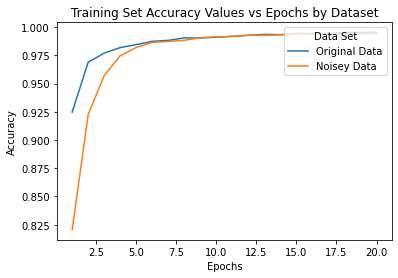

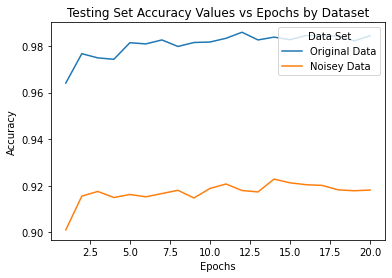

In [6]:
epoch_num = list(range(1, len(history.history["accuracy"])+1))

# plot scores
plot = plt.figure()

plt.plot(epoch_num, history.history["accuracy"], label = "Original Data")
plt.plot(epoch_num, history_noise.history["accuracy"], label = "Noisey Data")

plt.legend(title = "Data Set", loc = 'upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Set Accuracy Values vs Epochs by Dataset")

plot_test = plt.figure()

plt.plot(epoch_num, history.history["val_accuracy"], label = "Original Data")
plt.plot(epoch_num, history_noise.history["val_accuracy"], label = "Noisey Data")

plt.legend(title = "Data Set", loc = 'upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Testing Set Accuracy Values vs Epochs by Dataset")



## Comparing Different Noise Scale Values 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [============================

 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 1.0889 - accuracy: 0.6309 - val_loss: 0.8081 - val_accuracy: 0.7238
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6682 - accuracy: 0.7759 - val_loss: 0.7316 - val_accuracy: 0.7576
Epoch 3/20
469/469 [============================

                                                                 
 dense_20 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 2.4451 - accuracy: 0.1523 - val_loss: 2.1501 - val_accuracy: 0.2169
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 2.0861 - accuracy: 0.2538 - val_loss: 2.1274 - val_accuracy: 0.2345
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 1.9492 - accuracy: 0.3106 - val_loss: 2.1518 - val_accuracy: 0.2292
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 1.8305 - accuracy: 0.3518 - val_loss: 2.1718 - val_accuracy: 0.2248
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 1.7150 - accuracy: 0.

Text(0.5, 1.0, 'Test Set Accuracy Values vs Epochs by Noise Scale Value')

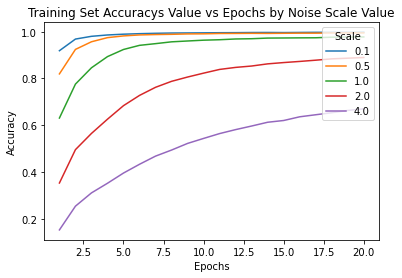

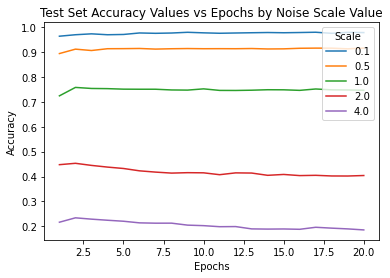

In [7]:
scales = [.1, .5, 1.0, 2.0, 4.0]
scores = []
scores_test = []
scale_nums = []

for n in scales:
    # the data, shuffled and split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    x_train = np.random.normal(x_train, scale = n)
    x_test = np.random.normal(x_test, scale = n)
    
    batch_size = 128
    num_classes = 10
    epochs = 20
    
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    
    model.summary()
    
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
    history_test = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    
    score = model.evaluate(x_test, y_test, verbose=0)

       # evaluate the model
    accuracy = history_test.history["accuracy"]
    accuracy_test = history_test.history["val_accuracy"]
    scores.append(accuracy)
    scores_test.append(accuracy_test)
    scale_num = n
    scale_nums.append(scale_num)
    epoch_num = list(range(1, len(scores[0])+1))

# plot scores
plot = plt.figure()

for i in range(len(scores)):
    plt.plot(epoch_num, scores[i], label = scale_nums[i])
plt.legend(title = "Scale", loc = 'upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Set Accuracys Value vs Epochs by Noise Scale Value")

plot_test = plt.figure()

for k in range(len(scores_test)):
    plt.plot(epoch_num, scores_test[k], label = scale_nums[k])
plt.legend(title = "Scale", loc = 'upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test Set Accuracy Values vs Epochs by Noise Scale Value")

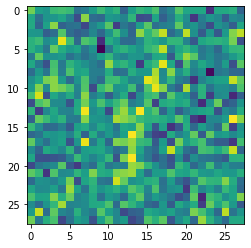

In [14]:
plt.imshow(x_test[2].reshape(28,28))